In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk.tokenize import wordpunct_tokenize,word_tokenize,sent_tokenize,TreebankWordTokenizer,TweetTokenizer
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
df=pd.read_csv("/content/drive/MyDrive/luminar data/Consumer NLP.csv")
df

,Unnamed: 0,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
1,1,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
2,2,2014-01-10,Credit card,NaN,APR or interest rate,NaN,NaN,NaN,TD Bank US Holding Company,FL,33180,NaN,NaN,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
3,3,2015-12-07,Credit card,NaN,Payoff process,NaN,NaN,NaN,Capital One,IL,60610,NaN,Consent not provided,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
4,4,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,"Citizens Financial Group, Inc.",PA,18337,NaN,NaN,Web,2012-04-05,Closed with relief,Yes,Yes,44225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,8890,2015-08-31,Credit reporting,NaN,Credit monitoring or identity protection,Billing dispute,NaN,Company chooses not to provide a public response,Experian,DC,20004,NaN,Consent not provided,Web,2015-08-31,Closed with monetary relief,Yes,No,1544326
8891,8891,2014-07-07,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Bank of America,MO,63123,NaN,NaN,Web,2014-07-07,Closed with explanation,Yes,No,926146
8892,8892,2015-05-12,Consumer Loan,Vehicle loan,Problems when you are unable to pay,NaN,having less than perfect credit I accepted a a...,NaN,Capital One,AZ,857XX,Older American,Consent provided,Web,2015-05-12,Closed with explanation,Yes,No,1371979
8893,8893,2014-12-03,Debt collection,Credit card,Communication tactics,Frequent or repeated calls,NaN,NaN,HSBC North America Holdings Inc.,MD,21921,NaN,NaN,Web,2014-12-17,Closed with explanation,Yes,No,1141057


In [3]:
print("Shape of Data:",df.shape)

Shape of Data: (8895, 19)


In [4]:
print('Coloumns of the dataset:',df.columns)

Coloumns of the dataset: Index(['Unnamed: 0', 'Date received', 'Product', 'Sub-product', 'Issue',
       'Sub-issue', 'Consumer complaint narrative', 'Company public response',
       'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')


In [5]:
print("Datatypes:",df.dtypes)

Datatypes: Unnamed: 0                       int64
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer complaint narrative    object
Company public response         object
Company                         object
State                           object
ZIP code                        object
Tags                            object
Consumer consent provided?      object
Submitted via                   object
Date sent to company            object
Company response to consumer    object
Timely response?                object
Consumer disputed?              object
Complaint ID                     int64
dtype: object


Checking the null values

In [6]:
df.isnull().sum()/8895*100

Unnamed: 0                       0.000000
Date received                    0.000000
Product                          0.000000
Sub-product                     28.229342
Issue                            0.000000
Sub-issue                       60.865655
Consumer complaint narrative    83.473862
Company public response         80.460933
Company                          0.000000
State                            0.708263
ZIP code                         0.708263
Tags                            86.115795
Consumer consent provided?      70.680157
Submitted via                    0.000000
Date sent to company             0.000000
Company response to consumer     0.000000
Timely response?                 0.000000
Consumer disputed?               0.000000
Complaint ID                     0.000000
dtype: float64

We can remove columns where more than 50% of the data is missing

In [7]:
df.drop(['Sub-issue','Consumer complaint narrative','Company public response','Tags','Consumer consent provided?'],axis=1,inplace=True)
df


,Unnamed: 0,Date received,Product,Sub-product,Issue,Company,State,ZIP code,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,0,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,Wells Fargo & Company,GA,319XX,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
1,1,2015-01-30,Debt collection,Medical,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,90036,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613
2,2,2014-01-10,Credit card,NaN,APR or interest rate,TD Bank US Holding Company,FL,33180,Web,2014-01-15,Closed with explanation,Yes,Yes,663281
3,3,2015-12-07,Credit card,NaN,Payoff process,Capital One,IL,60610,Web,2015-12-07,Closed with explanation,Yes,Yes,1685130
4,4,2012-04-05,Bank account or service,Checking account,Deposits and withdrawals,"Citizens Financial Group, Inc.",PA,18337,Web,2012-04-05,Closed with relief,Yes,Yes,44225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,8890,2015-08-31,Credit reporting,NaN,Credit monitoring or identity protection,Experian,DC,20004,Web,2015-08-31,Closed with monetary relief,Yes,No,1544326
8891,8891,2014-07-07,Mortgage,FHA mortgage,"Loan servicing, payments, escrow account",Bank of America,MO,63123,Web,2014-07-07,Closed with explanation,Yes,No,926146
8892,8892,2015-05-12,Consumer Loan,Vehicle loan,Problems when you are unable to pay,Capital One,AZ,857XX,Web,2015-05-12,Closed with explanation,Yes,No,1371979
8893,8893,2014-12-03,Debt collection,Credit card,Communication tactics,HSBC North America Holdings Inc.,MD,21921,Web,2014-12-17,Closed with explanation,Yes,No,1141057


**Missing Value Handling**


Fill the State Column with Mode

In [8]:
df['State'].isnull().sum()

63

In [9]:
print("Mode value:",df['State'].mode()[0])
df['State']=df['State'].fillna(df['State'].mode()[0])
df['State'].isnull().sum()

Mode value: CA


0

In [10]:
df.isnull().sum()

Unnamed: 0                         0
Date received                      0
Product                            0
Sub-product                     2511
Issue                              0
Company                            0
State                              0
ZIP code                          63
Submitted via                      0
Date sent to company               0
Company response to consumer       0
Timely response?                   0
Consumer disputed?                 0
Complaint ID                       0
dtype: int64

**Exploratory Data Analysis**

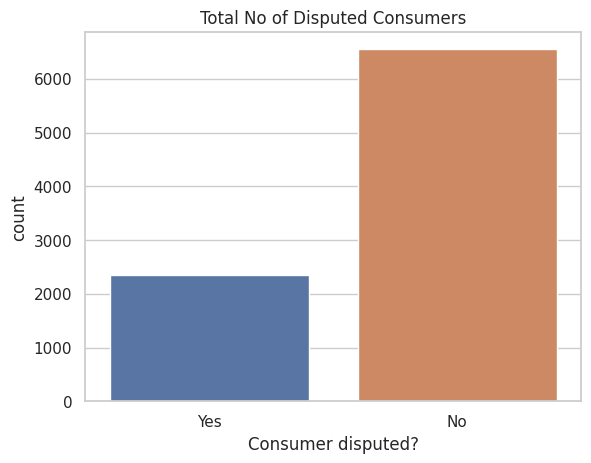

In [11]:
sns.set_theme(style='whitegrid')
plt.title("Total No of Disputed Consumers")
sns.countplot(x=df['Consumer disputed?'])
plt.show()

Here we can see that there is a huge variation between the target variables.The data is imbalanced

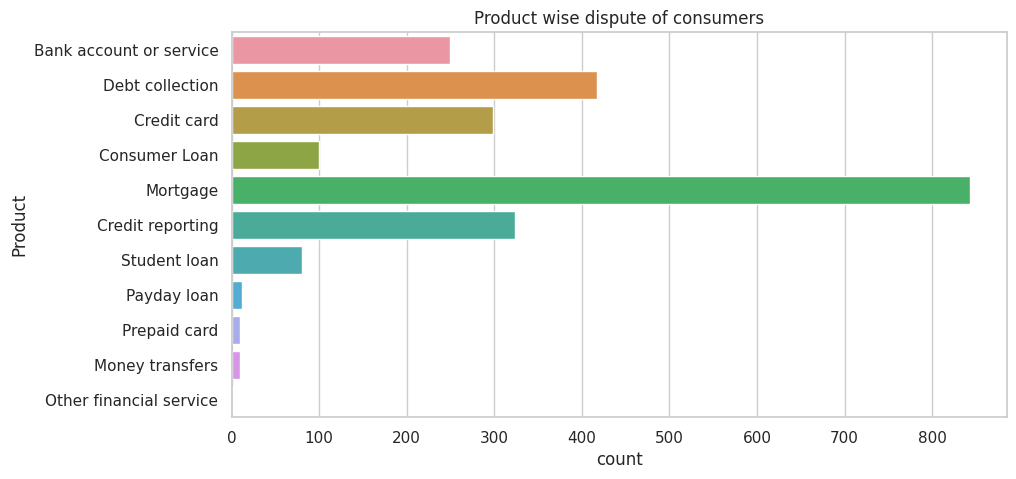

In [12]:
plt.figure(figsize=(10,5))
plt.title("Product wise dispute of consumers")
disputed_consumers=df.loc[df['Consumer disputed?']=='Yes']
sns.countplot(data=disputed_consumers,y='Product')
plt.show()



Majority of the consumers are disputed related to mortgage issues

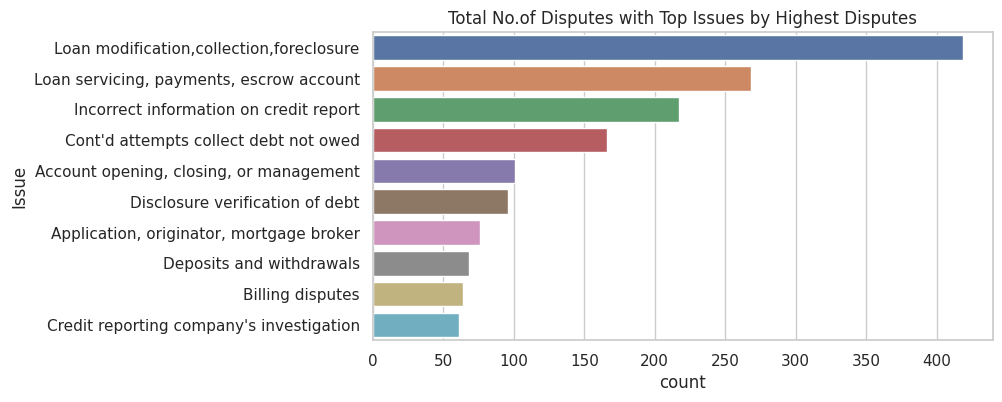

In [13]:
plt.figure(figsize=(8,4))
plt.title("Total No.of Disputes with Top Issues by Highest Disputes")
sns.countplot(data=disputed_consumers,y=disputed_consumers['Issue'],order=disputed_consumers['Issue'].value_counts().iloc[0:10].index)
plt.show()

Most of the complaints are related to Loans and Foreclosure issues and then comes loan services and payments issues and so on

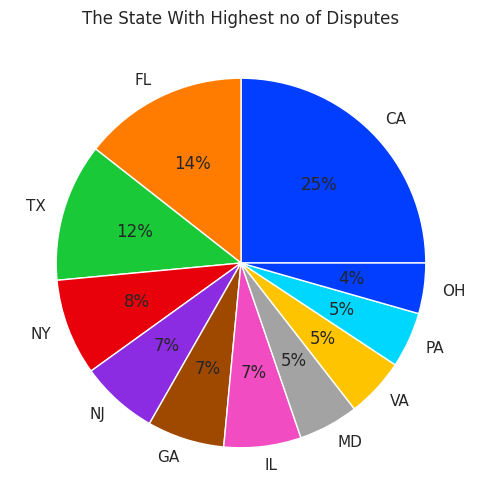

In [14]:
plt.figure(figsize=(6,6))
color = sns.color_palette('bright')
plt.title("The State With Highest no of Disputes")
plt.pie(disputed_consumers['State'].value_counts().iloc[0:11],labels=disputed_consumers['State'].value_counts().iloc[0:11].index,autopct='%.0f%%',colors=color)
plt.show()

California is the state with highest no of disputes

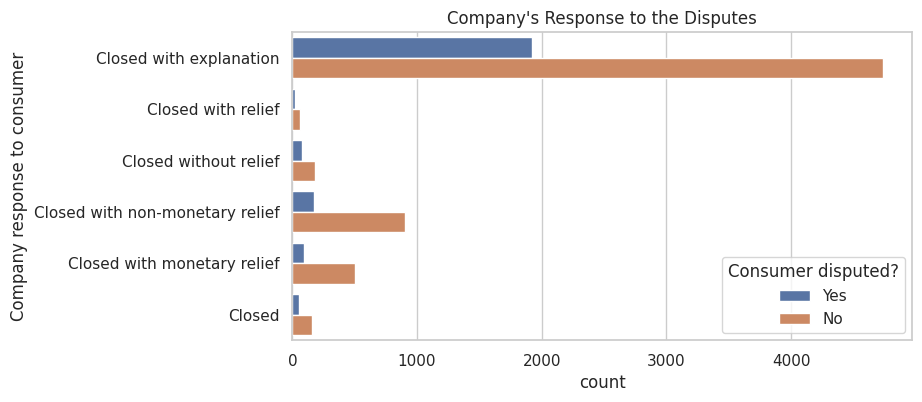

In [15]:
plt.figure(figsize=(8,4))
plt.title("Company's Response to the Disputes")
sns.countplot(data=df, y="Company response to consumer",hue="Consumer disputed?")
plt.show()

Most of the consumers are disputed with the **'Closed with explanation Category'**

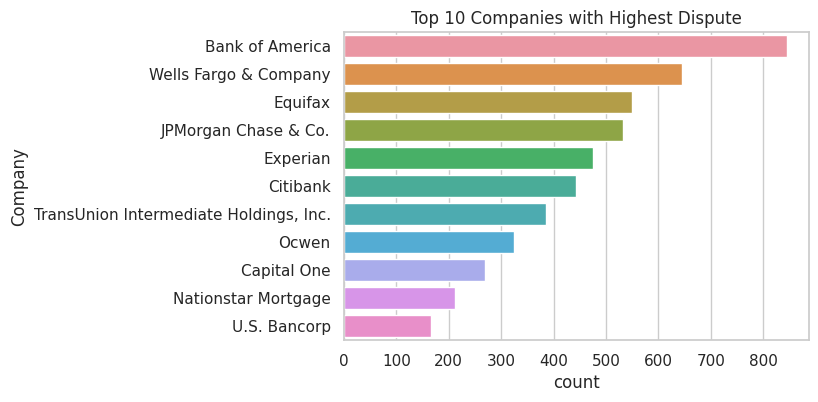

In [16]:
plt.figure(figsize=(6,4))
plt.title("Top 10 Companies with Highest Dispute")
sns.countplot(data=disputed_consumers, y=df["Company"],order=df['Company'].value_counts().iloc[:11].index)
plt.show()

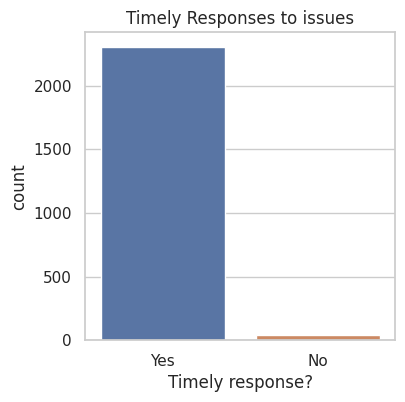

In [17]:
plt.figure(figsize=(4,4))
plt.title("Timely Responses to issues")
sns.countplot(data=disputed_consumers, x="Timely response?")
plt.show()

Most of the times companies Responded Timely

## *Preprocessing*

In [18]:
text=df['Issue']
text

0                       Deposits and withdrawals
1                Disclosure verification of debt
2                           APR or interest rate
3                                 Payoff process
4                       Deposits and withdrawals
                          ...                   
8890    Credit monitoring or identity protection
8891    Loan servicing, payments, escrow account
8892         Problems when you are unable to pay
8893                       Communication tactics
8894                  Managing the loan or lease
Name: Issue, Length: 8895, dtype: object

In [19]:
#Tokenization
tw=TreebankWordTokenizer()
text=text.apply(lambda line:[token for token in tw.tokenize(line)])
text

0                            [Deposits, and, withdrawals]
1                    [Disclosure, verification, of, debt]
2                               [APR, or, interest, rate]
3                                       [Payoff, process]
4                            [Deposits, and, withdrawals]
                              ...                        
8890       [Credit, monitoring, or, identity, protection]
8891    [Loan, servicing, ,, payments, ,, escrow, acco...
8892          [Problems, when, you, are, unable, to, pay]
8893                             [Communication, tactics]
8894                     [Managing, the, loan, or, lease]
Name: Issue, Length: 8895, dtype: object

In [20]:
#Removing Stopwords
sw=stopwords.words('english')
text=text.apply(lambda line:[token for token in line if token.lower() not in sw]).apply(lambda token:" ".join(token))
text

0                             Deposits withdrawals
1                     Disclosure verification debt
2                                APR interest rate
3                                   Payoff process
4                             Deposits withdrawals
                           ...                    
8890         Credit monitoring identity protection
8891    Loan servicing , payments , escrow account
8892                           Problems unable pay
8893                         Communication tactics
8894                           Managing loan lease
Name: Issue, Length: 8895, dtype: object

In [21]:
#Lemmatisation
from nltk.stem import WordNetLemmatizer
wd=WordNetLemmatizer()
text=text.apply(lambda line:[wd.lemmatize(token) for token in tw.tokenize(line)]).apply(lambda token:" ".join(token))
text

0                             Deposits withdrawal
1                    Disclosure verification debt
2                               APR interest rate
3                                  Payoff process
4                             Deposits withdrawal
                          ...                    
8890        Credit monitoring identity protection
8891    Loan servicing , payment , escrow account
8892                          Problems unable pay
8893                         Communication tactic
8894                          Managing loan lease
Name: Issue, Length: 8895, dtype: object

In [22]:
#Removing punctuatins and Special Charactors
text=text.str.replace('[^a-zA-Z0-9]+'," ")
text

0                         Deposits withdrawal
1                Disclosure verification debt
2                           APR interest rate
3                              Payoff process
4                         Deposits withdrawal
                        ...                  
8890    Credit monitoring identity protection
8891    Loan servicing payment escrow account
8892                      Problems unable pay
8893                     Communication tactic
8894                      Managing loan lease
Name: Issue, Length: 8895, dtype: object

In [23]:
text=text.apply(lambda line:[token for token in tw.tokenize(line) if len(token)>2]).apply(lambda token:" ".join(token))
text

0                         Deposits withdrawal
1                Disclosure verification debt
2                           APR interest rate
3                              Payoff process
4                         Deposits withdrawal
                        ...                  
8890    Credit monitoring identity protection
8891    Loan servicing payment escrow account
8892                      Problems unable pay
8893                     Communication tactic
8894                      Managing loan lease
Name: Issue, Length: 8895, dtype: object

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
new_text=vec.fit_transform(text).toarray()
new_text

array([[0.        , 0.        , 0.        , ..., 0.70710678, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
#Remove unwanted coloumns for Model buliding
final_data=df.drop(['Date received','Product','Company','State','ZIP code','Submitted via','Date sent to company','Company response to consumer','Timely response?','Complaint ID','Sub-product','Issue'],axis=1)
final_data['Issues Cleaned']=text
final_data


,Unnamed: 0,Consumer disputed?,Issues Cleaned
0,0,Yes,Deposits withdrawal
1,1,Yes,Disclosure verification debt
2,2,Yes,APR interest rate
3,3,Yes,Payoff process
4,4,Yes,Deposits withdrawal
...,...,...,...
8890,8890,No,Credit monitoring identity protection
8891,8891,No,Loan servicing payment escrow account
8892,8892,No,Problems unable pay
8893,8893,No,Communication tactic


In [26]:
final_data['Consumer disputed?']=final_data['Consumer disputed?'].map({'Yes':1,'No':0})
final_data

,Unnamed: 0,Consumer disputed?,Issues Cleaned
0,0,1,Deposits withdrawal
1,1,1,Disclosure verification debt
2,2,1,APR interest rate
3,3,1,Payoff process
4,4,1,Deposits withdrawal
...,...,...,...
8890,8890,0,Credit monitoring identity protection
8891,8891,0,Loan servicing payment escrow account
8892,8892,0,Problems unable pay
8893,8893,0,Communication tactic


In [27]:
final_text=pd.DataFrame(new_text)
final_text

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.632066,0.000000,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.707107,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8890,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8891,0.423893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8892,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
8893,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


Splitting X and Y variables

In [28]:
X=final_text
y=final_data['Consumer disputed?']


**Model Building**

In [29]:
from imblearn.over_sampling import ADASYN
nm=ADASYN(random_state=1)
X_us,y_us=nm.fit_resample(X,y)

In [30]:
y_us.value_counts()

0    6549
1    6539
Name: Consumer disputed?, dtype: int64

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X_us,y_us,test_size=0.2,random_state=0)

In [32]:
#KneighborsClassifier
knn=KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,y_train)
y_pred_knn=knn.predict(X_test)

#DecisionTree Classfier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred_dt=dt.predict(X_test)

#RandomForest Classifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred_rf=rf.predict(X_test)

#AdaBoost Classifier
ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
y_pred_ad=ad.predict(X_test)

#GradientBoosting Classifier
gd=GradientBoostingClassifier()
gd.fit(X_train,y_train)
y_pred_gd=gd.predict(X_test)

#xgboost classifier
xg=XGBClassifier()
xg.fit(X_train,y_train)
y_pred_xg=xg.predict(X_test)



**************Classification Reports and ConfusionMatrix*************
KNeighbors Classifier:               precision    recall  f1-score   support

           0       0.74      0.87      0.80      1307
           1       0.84      0.69      0.76      1311

    accuracy                           0.78      2618
   macro avg       0.79      0.78      0.78      2618
weighted avg       0.79      0.78      0.78      2618

ConfusionMatrix knn: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c4752c45660>
DecisionTree Classifier:               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1307
           1       0.95      0.67      0.79      1311

    accuracy                           0.82      2618
   macro avg       0.85      0.82      0.81      2618
weighted avg       0.85      0.82      0.81      2618

ConfusionMatrix decisionTree: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7c4752cac4f0>

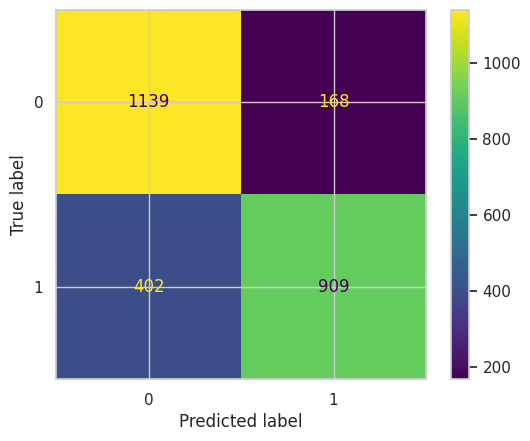

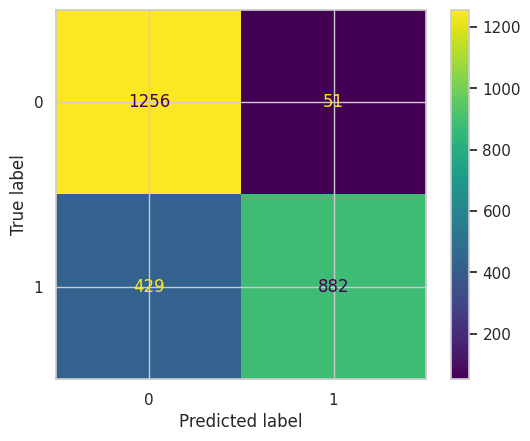

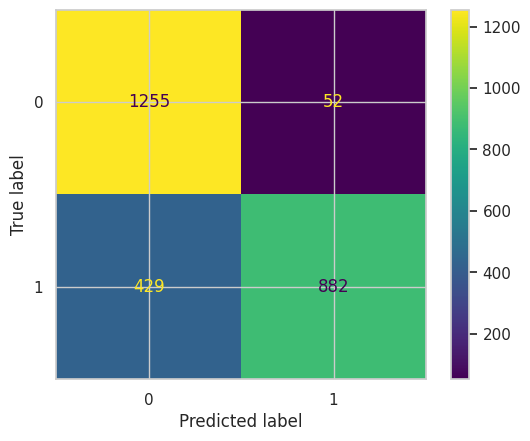

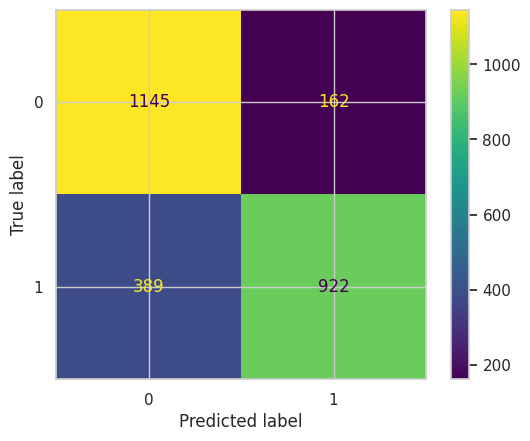

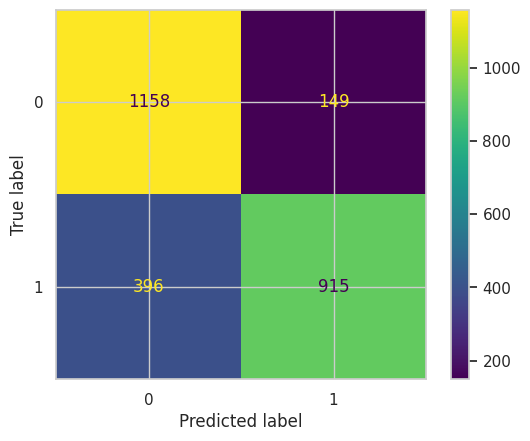

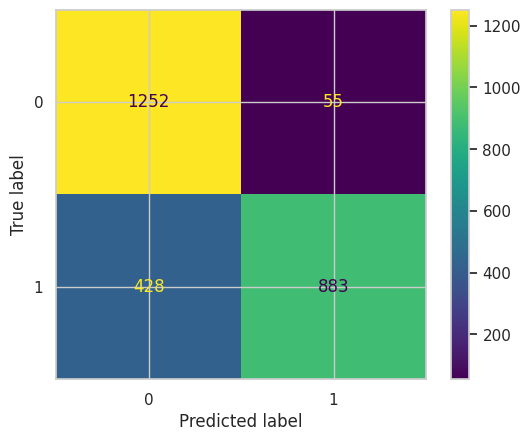

In [35]:
print("**************Classification Reports and ConfusionMatrix*************")
print("KNeighbors Classifier:",classification_report(y_test,y_pred_knn))
print("ConfusionMatrix knn:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn))
print("DecisionTree Classifier:",classification_report(y_test,y_pred_dt))
print("ConfusionMatrix decisionTree:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dt))
print("RandomForest Classifier:",classification_report(y_test,y_pred_rf))
print("ConfusionMatrix RandomForest:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rf))
print("AdaBoost Classifier:",classification_report(y_test,y_pred_ad))
print("ConfusionMatrix adaboost:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_ad))
print("GradientBoost Classfier:",classification_report(y_test,y_pred_gd))
print("ConfusionMatrix gradientboost:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_gd))
print("Xgboost classifier:",classification_report(y_test,y_pred_xg))
print("ConfusionMatrix xgboost:",ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xg))

Feature Extraction

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=60)
principalComponentrs = pca.fit_transform(X_us)

In [37]:
principal_df=pd.DataFrame(principalComponentrs)
principal_df

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,-0.094320,-0.056875,-0.108212,-0.154951,-0.117845,-0.096261,-0.010829,-0.144691,-0.028681,-0.046969,...,0.000385,0.000815,-0.002856,-0.003570,-0.000725,-0.000416,-0.002651,0.000977,0.000504,-0.001674
1,-0.119901,-0.091549,-0.261342,0.093039,-0.061159,-0.160897,-0.460751,0.616262,-0.497314,-0.018266,...,-0.027212,-0.005095,-0.005286,-0.003875,-0.000561,-0.000314,-0.003672,0.000973,0.001695,-0.000441
2,-0.084867,-0.048965,-0.090354,-0.118877,-0.079544,-0.046279,-0.004555,-0.062489,-0.021157,-0.042795,...,0.010463,0.017060,-0.037330,-0.011224,0.028516,-0.019725,-0.020956,0.005869,0.003267,-0.009510
3,-0.081164,-0.046036,-0.083848,-0.106512,-0.067391,-0.031470,-0.002337,-0.025326,-0.003464,-0.005406,...,-0.001247,-0.003186,0.017219,0.033505,0.007595,0.008615,0.039720,-0.008497,-0.006787,0.028367
4,-0.094320,-0.056875,-0.108212,-0.154951,-0.117845,-0.096261,-0.010829,-0.144691,-0.028681,-0.046969,...,0.000385,0.000815,-0.002856,-0.003570,-0.000725,-0.000416,-0.002651,0.000977,0.000504,-0.001674
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13083,0.027865,-0.058088,-0.022636,-0.069771,-0.088168,0.035514,0.004273,-0.009890,-0.003989,-0.040279,...,0.007998,-0.008122,-0.007971,-0.009003,-0.000221,-0.000317,-0.004422,0.001532,0.001271,-0.003194
13084,0.027865,-0.058088,-0.022636,-0.069771,-0.088168,0.035514,0.004273,-0.009890,-0.003989,-0.040279,...,0.007998,-0.008122,-0.007971,-0.009003,-0.000221,-0.000317,-0.004422,0.001532,0.001271,-0.003194
13085,0.027865,-0.058088,-0.022636,-0.069771,-0.088168,0.035514,0.004273,-0.009890,-0.003989,-0.040279,...,0.007998,-0.008122,-0.007971,-0.009003,-0.000221,-0.000317,-0.004422,0.001532,0.001271,-0.003194
13086,0.024168,-0.057561,-0.024565,-0.070674,-0.087106,0.033397,0.004061,-0.010203,-0.003937,-0.039001,...,0.007640,-0.008007,-0.007138,-0.007898,-0.000051,-0.000248,-0.003671,0.001192,0.001100,-0.002629


In [45]:
X_pca_train,X_pca_test,y_pca_train,y_pca_test=train_test_split(principal_df,y_us,test_size=0.2,random_state=0)

In [63]:
rf_pca=RandomForestClassifier()
rf_pca.fit(X_pca_train,y_pca_train)
y_pred_pca_rf=rf_pca.predict(X_pca_test)

In [47]:
dt=DecisionTreeClassifier()
dt.fit(X_pca_train,y_pca_train)
y_pred_pca_dt=dt.predict(X_pca_test)

In [64]:
print('RandomForest Classifier_pca:',classification_report(y_pca_test,y_pred_pca_rf))

RandomForest Classifier_pca:               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1307
           1       0.94      0.67      0.79      1311

    accuracy                           0.82      2618
   macro avg       0.84      0.82      0.81      2618
weighted avg       0.84      0.82      0.81      2618



In [49]:
print("Decisiontree Classifier_pca:",classification_report(y_pca_test,y_pred_pca_dt))

Decisiontree Classifier_pca:               precision    recall  f1-score   support

           0       0.75      0.96      0.84      1307
           1       0.94      0.67      0.79      1311

    accuracy                           0.82      2618
   macro avg       0.84      0.82      0.81      2618
weighted avg       0.84      0.82      0.81      2618



In [51]:
knn=KNeighborsClassifier(metric='euclidean')
knn.fit(X_pca_train,y_pca_train)
y_pred_knn_pca=knn.predict(X_pca_test)

In [52]:
print("KNN_pca_report",classification_report(y_pca_test,y_pred_knn_pca))

KNN_pca_report               precision    recall  f1-score   support

           0       0.74      0.87      0.80      1307
           1       0.84      0.70      0.76      1311

    accuracy                           0.78      2618
   macro avg       0.79      0.78      0.78      2618
weighted avg       0.79      0.78      0.78      2618



In [60]:
gd_pca=GradientBoostingClassifier()
gd_pca.fit(X_pca_train,y_pca_train)
y_pred_gd_pca=gd_pca.predict(X_pca_test)

In [61]:
print("Classification_report_gdboost_pca",classification_report(y_pca_test,y_pred_gd_pca))

Classification_report_gdboost_pca               precision    recall  f1-score   support

           0       0.75      0.95      0.84      1307
           1       0.94      0.67      0.78      1311

    accuracy                           0.81      2618
   macro avg       0.84      0.81      0.81      2618
weighted avg       0.84      0.81      0.81      2618

